In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import math

from scipy import stats

from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.io import loadmat
import os
# library written for this exercise providing additional functions for assignment submission, and others
import utils
from scipy.optimize import fmin_cg
import scipy.io as si
# define the submission/grader object for this

In [2]:
mydata = loadmat('data/ex3data1.mat')
X, y = mydata['X'], mydata['y'].ravel()

# The images are of size 20 * 20, this gives us 400 input layer units

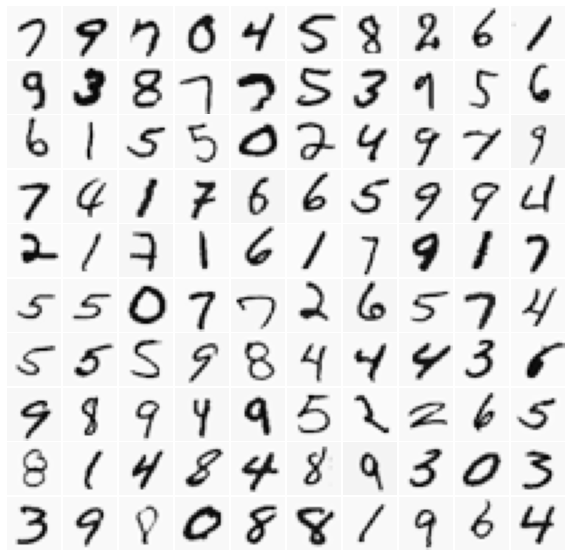

In [3]:
# vitualize data
m = y.size
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
#give numbers from 0 to 9
y[y == 10] = 0
utils.displayData(sel)

# Neural Networks

# 3 layers - an input layer, a hidden layer and an output layer.

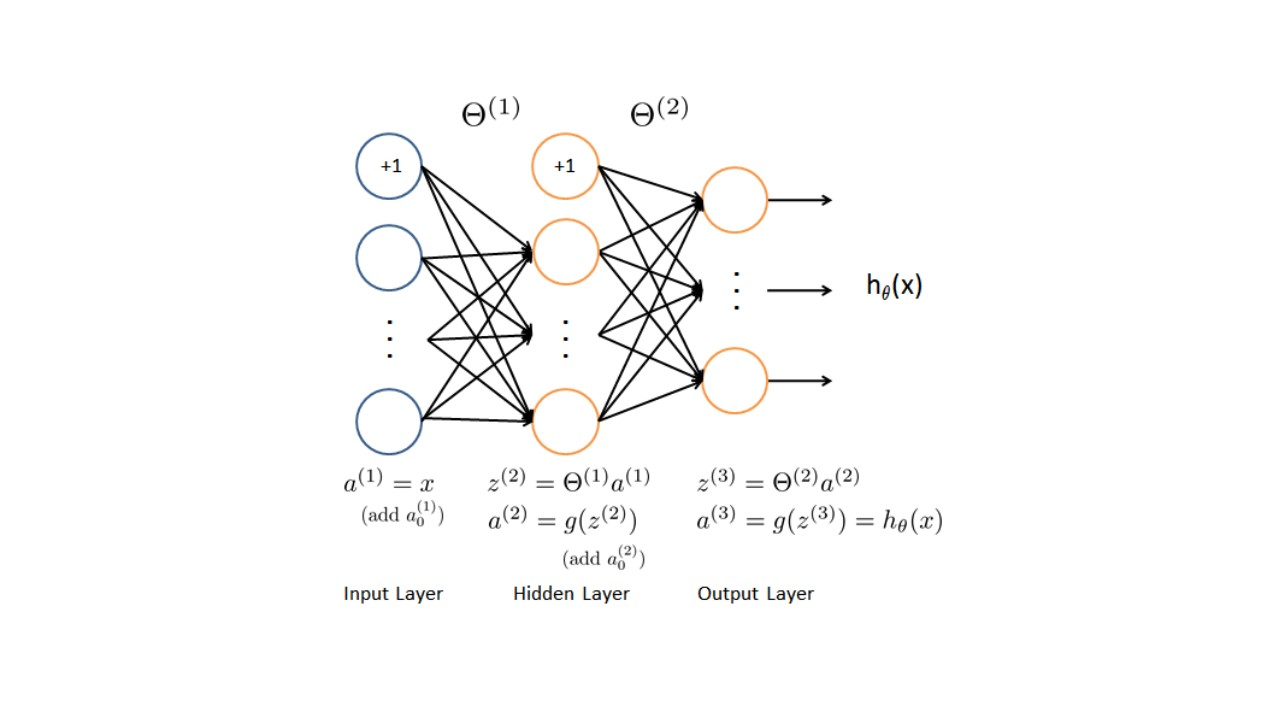

In [19]:
from IPython import display
display.Image("./ex3,NN.jpg", width=700)

# $\theta_1$ and $\theta_2$ are given in this exercise

In [4]:
#weights are given
a = si.loadmat('data/ex3weights.mat')
Theta1 = a['Theta1']
Theta2 = a['Theta2']
# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

In [5]:
#check
Theta1

array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
        -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
       [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
        -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
       [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
        -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
       ...,
       [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
         2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
       [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
        -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
       [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
        -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]])

In [6]:
#check
Theta2

array([[-0.46089119, -1.43944954, -1.21809509,  0.71093011,  0.45216919,
        -0.35953381,  0.62284954, -0.67005297, -0.7069138 ,  0.06311351,
        -1.23199074, -1.74645233, -2.71960897, -2.21437178, -1.69307505,
        -0.90927394,  0.87852311,  1.18664814, -1.87041262,  0.39796295,
         1.72113872, -1.36934055,  0.8580668 , -0.24779579,  1.28009118,
        -1.32752042],
       [-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.05778129,
        -2.20823629,  0.56383834,  1.21105294,  2.21030997,  0.44456156,
        -1.18244872,  1.04289112, -1.60558756,  1.30419943,  1.37175046,
         1.74825095, -0.23365648, -1.52014483,  1.15324176,  0.10368082,
        -0.37207719, -0.61530019, -0.1256836 , -2.27193038, -0.71836208,
        -1.29690315],
       [-0.61785176,  0.61559207, -1.26550639,  1.85745418, -0.91853319,
        -0.05502589, -0.38589806,  1.29520853, -1.56843297, -0.97026419,
        -2.18334895, -2.85033578, -2.07733086,  1.63163164,  0.3490229 ,
       

In [7]:
Theta1.shape

(25, 401)

In [8]:
Theta2.shape

(10, 26)

In [9]:
X.shape

(5000, 400)

In [10]:
def sigmoid(z):
    return  1 / (1 + np.exp(-z))

In [11]:
def predict(Theta1, Theta2, X):
    
    # sizes
    if X.ndim == 1:
        X = X[None]  # promote to 2-dimensions
    m = X.shape[0]
    n = X.shape[0]
    num_labels = Theta2.shape[0]
    p = np.zeros(X.shape[0])
    # add ones to X data matrix so that the X has (5000,401 dimention)
    X = np.hstack((np.ones((m, 1)), X))
        
    # hidden layer
    z2 = np.dot(X, Theta1.T)
    a2 = sigmoid(z2)

    #add bias unit to a2
    a2 = np.hstack((np.ones((a2.shape[0],1)), a2))

    # output layer
    z3 = np.dot(a2, Theta2.T)
    a3 = sigmoid(z3)

    p = np.argmax(a3, axis=1)
    
    return p

In [12]:
p = predict(Theta1, Theta2, X)
p

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [13]:
print('Training set Accuracy: %2.2f percent' % (np.mean(p==y)*100))

Training set Accuracy: 97.52 percent


Neural Network Prediction: 9


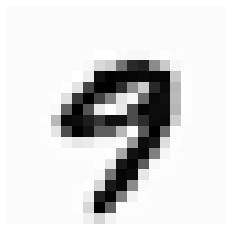

In [14]:
#check 
indices = np.random.permutation(m)
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(X[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')